In [1]:
import sys
sys.path.append("../")
import numpy as np
from model.acoustic_model import AcousticModel

gpu_id = 1
layer_sizes = [351, 500, 500, 500, 500, 500, 689]
epochs, pretrain, max_iter = 100, True, 5
batch_size = 800
train_num = 1255588
valid_num = 106849
trian_path = '/scratch/bdda/skhu/RM/lib/flists/train.scp'
valid_path = '/scratch/bdda/skhu/RM/lib/flists/cv.scp'

In [2]:
model = AcousticModel(layer_sizes, trian_path, valid_path,
                      train_num, valid_num, batch_size, gpu_id, test_baseline=True)
print(model.train(epochs, pretrain, max_iter))
count_params = 0
for p in model.GPNN.parameters():
    count_params += np.prod(list(p.size()))
print(count_params)

Epoch:  0 | time: 13.75s | train accuracy: 0.4311 | train_ll_loss: 3639.91 | train_kl_loss: 36.01
Epoch:  0 | valid loss: 190.21 | valid accuracy: 0.39
Epoch:  1 | time: 17.12s | train accuracy: 0.4710 | train_ll_loss: 3318.20 | train_kl_loss: 37.51
Epoch:  1 | valid loss: 150.55 | valid accuracy: 0.48
Epoch:  2 | time: 18.56s | train accuracy: 0.4567 | train_ll_loss: 3420.87 | train_kl_loss: 38.16
Epoch:  2 | valid loss: 148.93 | valid accuracy: 0.48
Epoch:  3 | time: 18.67s | train accuracy: 0.4630 | train_ll_loss: 3347.27 | train_kl_loss: 36.73
Epoch:  3 | valid loss: 149.50 | valid accuracy: 0.48
Epoch:  4 | time: 17.66s | train accuracy: 0.4696 | train_ll_loss: 3283.59 | train_kl_loss: 37.11
Epoch:  4 | valid loss: 151.08 | valid accuracy: 0.47
Epoch:  0 | time: 26.12s | learning rate: 2.00e-03 | train accuracy: 0.5274 | train_ll_loss: 2702.52 | train_kl_loss: 49.43
Epoch:  0 | best valid loss: 147.0976 | best valid accuracy: 0.4760 | valid loss: 147.0976 | valid accuracy: 0.4760


Epoch:  31 | time: 21.52s | learning rate: 2.50e-04 | train accuracy: 0.7934 | train_ll_loss: 1082.96 | train_kl_loss: 95.18
Epoch:  31 | best valid loss: 120.3778 | best valid accuracy: 0.5714 | valid loss: 120.5583 | valid accuracy: 0.5704
Epoch:  32 | time: 21.12s | learning rate: 1.25e-04 | train accuracy: 0.7962 | train_ll_loss: 1075.05 | train_kl_loss: 96.69
Epoch:  32 | best valid loss: 119.5403 | best valid accuracy: 0.5732 | valid loss: 119.5403 | valid accuracy: 0.5732
Epoch:  33 | time: 21.60s | learning rate: 1.25e-04 | train accuracy: 0.7986 | train_ll_loss: 1065.39 | train_kl_loss: 107.79
Epoch:  33 | best valid loss: 119.5403 | best valid accuracy: 0.5732 | valid loss: 120.3820 | valid accuracy: 0.5714
Epoch:  34 | time: 21.97s | learning rate: 1.25e-04 | train accuracy: 0.8007 | train_ll_loss: 1056.12 | train_kl_loss: 94.53
Epoch:  34 | best valid loss: 119.5403 | best valid accuracy: 0.5732 | valid loss: 120.0723 | valid accuracy: 0.5732
Epoch:  35 | time: 21.78s | lea

In [3]:
model.test()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
count = 0
train_accuracy = []
valid_accuracy = []
with open('result','r') as f:
    for line in f.readlines():
        line = line.strip()
        if count%2 == 0:
            line = line.split('|')[4].split()[2]
            train_accuracy.append(float(line))
        else:
            line = line.split('|')[4].split()[2]
            valid_accuracy.append(float(line))
        count += 1

gpnn_train_x = range(len(train_accuracy))
gpnn_train_y = np.asarray(train_accuracy)

gpnn_valid_x = range(len(valid_accuracy))
gpnn_valid_y = np.asarray(valid_accuracy)

dnn_train_y = np.asarray([23.66, 21.25, 21.05, 20.54, 24.13, 31.46, 34.00, 35.52, 36.56, 37.40, 38.05, \
              39.90, 40.51, 40.89, 42.02, 42.92, 43.44, 43.73, 43.88])/100
dnn_train_x = range(len(dnn_train_y))

dnn_valid_y = np.asarray([32.15, 28.68, 27.26, 26.29, 29.20, 32.62, 34.19, 34.74, 36.16, 36.81, 35.91, \
              38.85, 39.68, 39.38, 41.00, 41.71, 41.93, 42.21, 42.31])/100
dnn_valid_x = range(len(dnn_valid_y))
# plt.figure()
fig, ax = plt.subplots()

ax.plot(gpnn_train_x, gpnn_train_y, '*-', label='gpnn_train_acc', linewidth=1)
ax.plot(gpnn_valid_x, gpnn_valid_y, '*-', label='gpnn_valid_acc', linewidth=1)
ax.plot(dnn_train_x, dnn_train_y, '*-', label='dnn_train_acc', linewidth=1)
ax.plot(dnn_valid_x, dnn_valid_y, '*-', label='dnn_valid_acc', linewidth=1)
legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
# legend.get_frame().set_facecolor('#00FFCC')
plt.xlabel('epoch',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('Train and valid frame accuracy for DNN and GPNN')
plt.savefig('1.png')
plt.show()

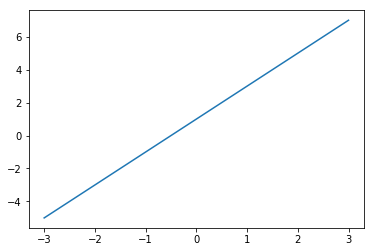

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3, 3, 50)
y1 = 2*x + 1
y2 = x**2
plt.figure()
plt.plot(x, y1)
plt.savefig('1.png')
plt.show()